In [85]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin

In [98]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 4


In [99]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['託付', '網路', '陳之漢', 'PO文'])

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就', '…', '再', '：', '「','」', '，', '我們', '你們', '如果', 'PO'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [100]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:15] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('深夜', 2),
 ('託付', 1),
 ('妻小', 1),
 ('館長', 6),
 ('恩情', 2),
 ('下輩子', 2),
 ('再還', 1),
 ('網路', 1),
 ('名人', 1),
 ('陳之漢', 1),
 ('經常', 1),
 ('分享', 1),
 ('人生', 1),
 ('經驗', 1),
 ('對', 1)]

In [101]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,原本,妻小,遭到,虧雞,試試,哪個,妨礙,比較,之憾,幹,...,邀,似乎,歡迎,上午,台南市,律師信,三字,求媽祖,上綱,應該
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0


In [102]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
df_tfidf = evaluate_tfidf(wfm)

In [103]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [104]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [105]:
wfm['館長']

0     6.0
1    10.0
2     3.0
3     8.0
Name: 館長, dtype: float64

In [106]:
df_tfidf['被告']

0    0.000000
1    0.374816
2    0.374816
3    0.029737
Name: 被告, dtype: float64

In [110]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:15] # 檢視一下轉換結果

[('原本', 0.0),
 ('妻小', 1.0),
 ('遭到', 0.0),
 ('虧雞', 0.0),
 ('試試', 0.0),
 ('哪個', 0.0),
 ('妨礙', 0.0),
 ('比較', 0.0),
 ('之憾', 0.0),
 ('幹', 0.0),
 ('來告', 0.0),
 ('等', 0.0),
 ('精神', 1.0),
 ('看館', 0.0),
 ('背', 1.0)]

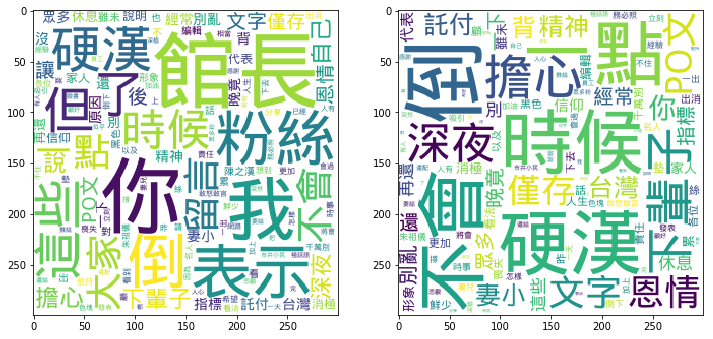

In [111]:
linux_font = r'..\wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

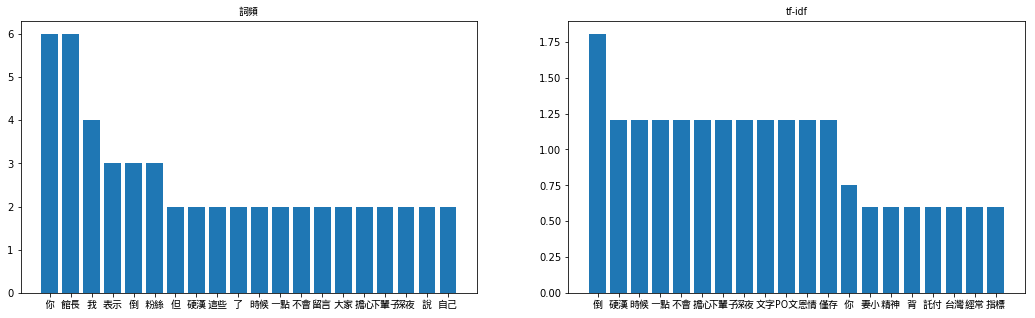

In [112]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")